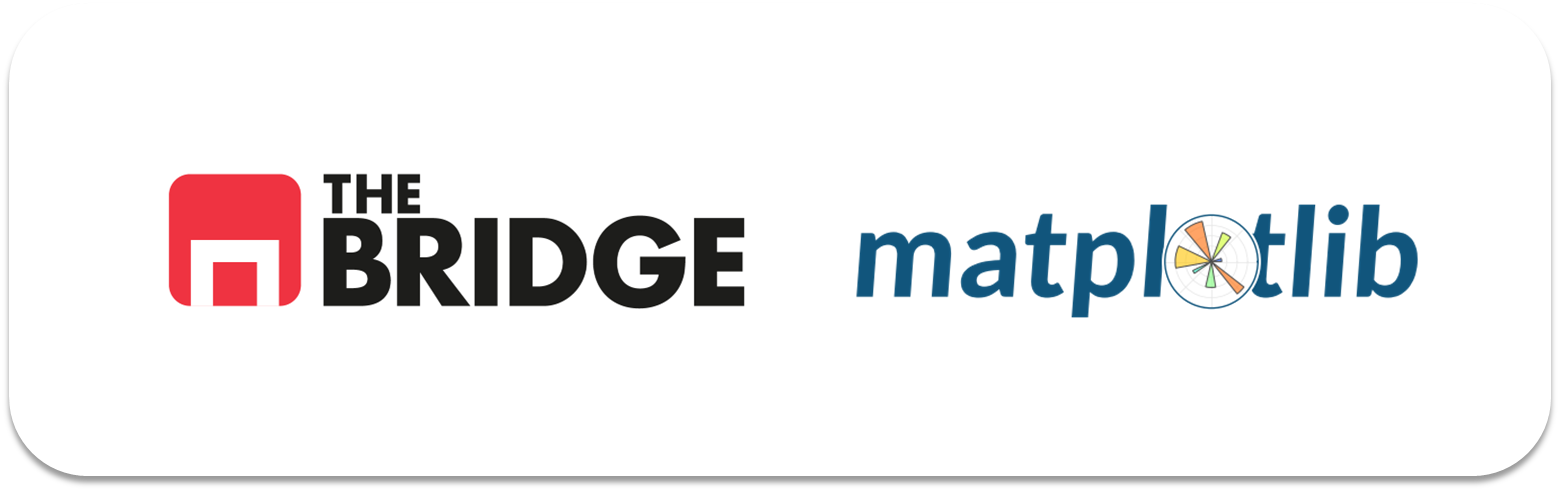

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # incorporamos a nuestra mesa de trabajo las herramientas que vamos a utilizar

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [15]:
df_california = pd.read_csv("./data/california_cities.csv")
df_california.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [16]:
# Una vez cargado el contenido, procedemos a eliminar la columna Unnamed: 0 porque no tiene valor. También podemos ver filas que contienen nulos (NaN)
df_california = df_california.drop(columns=["Unnamed: 0"])


In [17]:
df_california.isnull().sum() # Comprobamos cuantos nulos podemos ver en nuestro dataset

city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [18]:
# También eliminamos las filas con nulos.
df_california = df_california.dropna()  # Utilizamos dropna para eliminar las filas que contengan algún nulo.
df_california.isnull().sum() # Comrprobación después de borrado si es cierto qye ha eliminado los nulos que nos aparecían antes.


city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

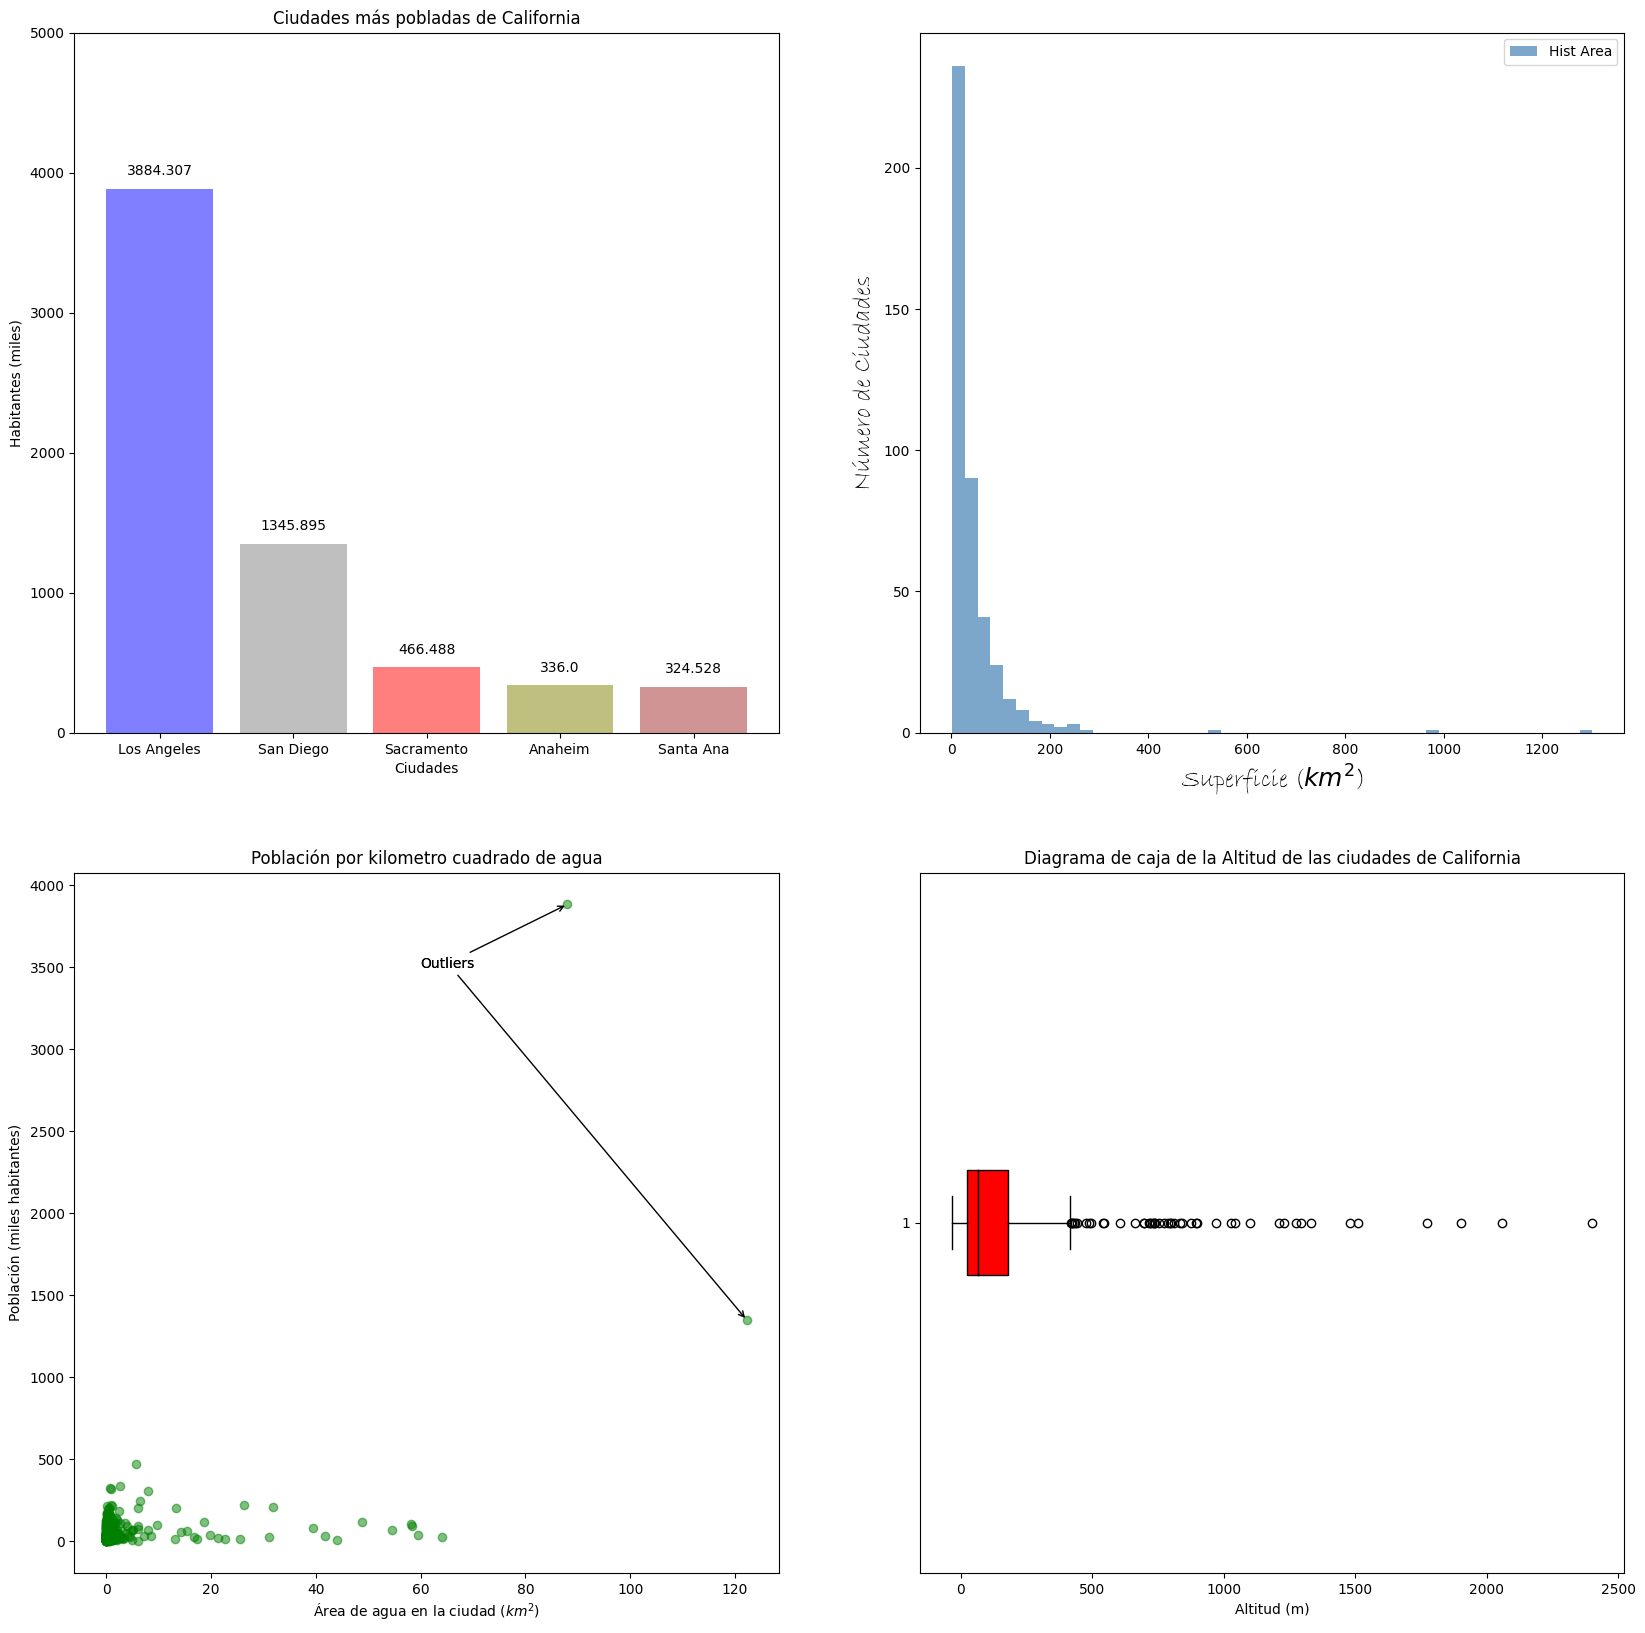

In [ ]:
df_california.head() # Lo hacemos para tener los datos a mano y evitar subir y bajar la pantalla cada vez que queremos consultar nuestros datos.

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


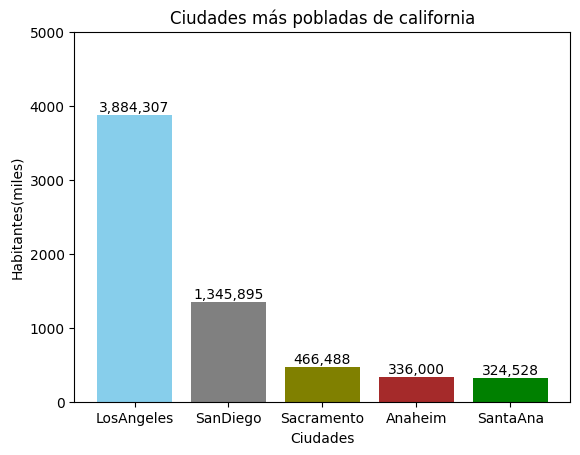

In [ ]:
# 1º GRÁFICO -> GRÁFICO DE BARRAS 

# DATOS DEL GRÁFICO
poblacion_ciudades = df_california.groupby("city")["population_total"].sum().sort_values(ascending=False).reset_index() # ordenamos el dataframe por ciudad teniendo en cuenta la suma de su población. En sort_value utilizamos "ascending = False" para ordenar de mayor a menos los datos
top_ciudades_mayor_poblacion = poblacion_ciudades.head(5)
top_ciudades_mayor_poblacion


# DIBUJO

colores = ['skyblue', 'gray', 'olive', 'brown', "green"]
plt.bar(top_ciudades_mayor_poblacion["city"], height=top_ciudades_mayor_poblacion["population_total"]/1000, color = colores)
plt.title("Ciudades más pobladas de california")
plt.ylim(0,5000) # establecemos el límite del gráfico con el eje y
plt.ylabel("Habitantes(miles)")
plt.xlabel("Ciudades")

for i, row in top_ciudades_mayor_poblacion.iterrows(): # i representa el indice de la fila mientras que row representa la fila completa con todos sus datos . En este caso , row representa tanto la ciudad como su población.
    ciudad = row["city"] # Accedemos a los valores de la columna city
    poblacion_miles = row["population_total"] / 1000 # Accedemos a los valores de la columna population_total y los dividimos entre 1000
    plt.text(ciudad, poblacion_miles + 50, f"{int(row['population_total']):,}", ha="center") # Pintamos por cada ciudad, el numero de población encima del limite de la barra 50 puntos, el numero de habitantes

plt.show() # mostramos el gráfico


In [65]:
df_california.head(2)

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37


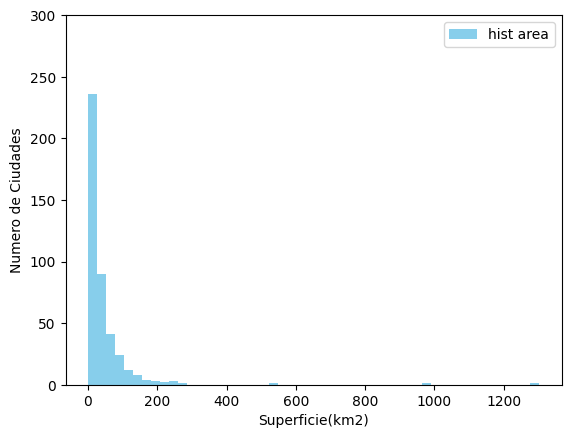

In [89]:
# 2º GRÁFICO -> HISTOGRAMA

# DATOS 
area_total_ciudades = df_california.groupby("city")["area_total_km2"].sum().sort_values(ascending=False).reset_index()
area_total_ciudades # Tenemos el área total en km2 de lo que ocupa cada ciudad.

# DIBUJO

plt.hist(area_total_ciudades["area_total_km2"], bins = 50 , color='skyblue', label= "hist area") # label lo utilizamos para poder mostrar la leyenda con ptl.legend
plt.ylim(0,300)
plt.legend()
plt.xlabel("Superficie(km2)")
plt.ylabel("Numero de Ciudades");

KeyError: 0

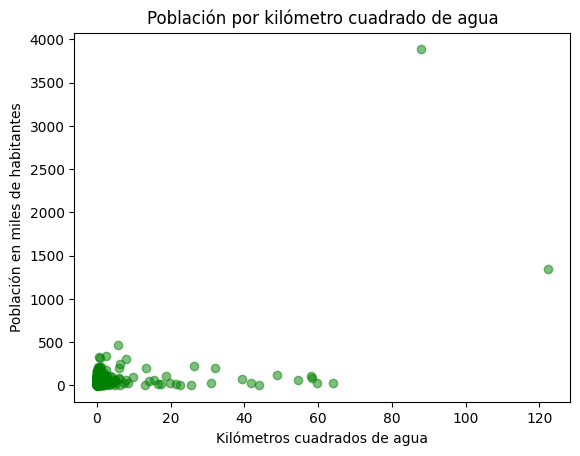

In [ ]:
# 3º GRÁFICO -> DIPERSIÓN

# DATOS
area_de_agua_numero_habitantes = df_california.groupby("population_total")["area_water_km2"].sum().sort_values(ascending = False).reset_index()
area_de_agua_numero_habitantes # obtenemos la superficie total de agua por cada población , o lo que es igual , por cada ciudad.

# DIBUJO BASE

plt.scatter(area_de_agua_numero_habitantes["area_water_km2"],
            area_de_agua_numero_habitantes["population_total"]/1000,
            color = "green",
            alpha = 0.5);

plt.title("Población por kilómetro cuadrado de agua")
plt.xlabel("Kilómetros cuadrados de agua")
plt.ylabel("Población en miles de habitantes");

# ANOTACIONES DE OUTLIERS

# Primero debemos de localizar las coordenadas de los outliers. Claramente hay dos.
x1 = area_de_agua_numero_habitantes

coordenada_outlier_1

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.